<a href="https://colab.research.google.com/github/ValentinKraravchenko/Data-mining-and-processing/blob/main/%D0%90%D0%BB%D0%B5%D0%BD%D1%83%D1%88%D0%BA%D0%B8%D0%BD_%D0%9A%D1%80%D0%B0%D0%B2%D1%87%D0%B5%D0%BD%D0%BA%D0%BE_%D0%9B%D0%90%D0%911.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузка необходимых пакетов и библиотек


In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_classif, chi2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, PolynomialFeatures
from google.colab import files

Загрузка датасета

In [ ]:
uploaded = files.upload()

Saving V1.csv to V1.csv


In [ ]:
# Считываем данные по варианту
pre_data = pd.read_csv('V1.csv')
# Отбрасываем первый столбец, который содержит индексы записей (за ненадобностью)
data = pre_data.iloc [: , 1:]

Выполнить разведочный анализ данных в соответствии с этапами описанными в файле Этапы проекта машинного обучения в примерах 1/2.pdf:
a. Ознакомление с данными с помощью методов описательной статистики;

In [ ]:
# Просмотрим первые 5 строк в наборе данных
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,NaN,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,NaN,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
# Определим размерность набора данных
data.shape

(500, 8)

In [ ]:
# Определим типы атрибутов в данных
data.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [ ]:
# Получим краткое описание данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       244 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
# Посмотрим, какие категории есть в поле Avatar в наборе данных и сколько атрибутов им принадлежит
data['Avatar'].value_counts()

SlateBlue               7
Cyan                    7
CadetBlue               7
GreenYellow             7
Teal                    7
                       ..
MediumPurple            1
CornflowerBlue          1
LightGoldenRodYellow    1
PowderBlue              1
LawnGreen               1
Name: Avatar, Length: 138, dtype: int64

In [ ]:
# Посмотрим сводку по числовым атрибутам
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,244.000000,500.000000,500.000000
mean,33.053194,12.052488,37.059040,3.533462,499.314038
std,0.992563,0.994216,1.037316,0.999278,79.314782
min,29.532429,8.508152,34.476878,0.269901,256.670582
25%,32.341822,11.388153,36.314920,2.930450,445.038277
50%,33.082008,11.983231,37.057153,3.533975,498.887875
75%,33.711985,12.753850,37.691903,4.126502,549.313828
max,36.139662,15.126994,39.672591,6.922689,765.518462


b. Выполнить визуализацию данных одномерную для понимания распределения данных и многомерную для выяснения зависимостей между признаками;

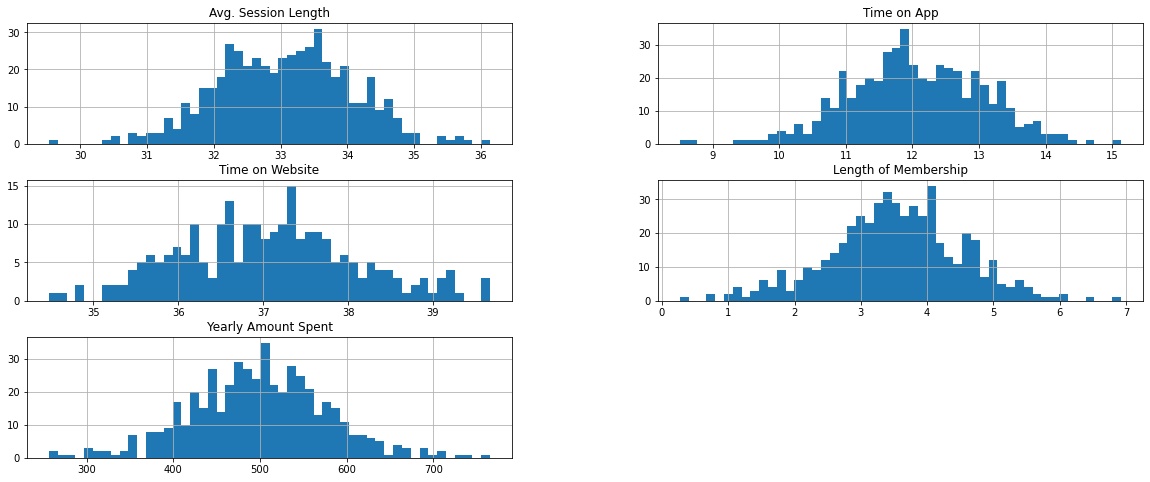

In [ ]:
# Выполним визуализацию данных с помощью гистограмм
data.hist(bins=50, figsize=(20, 8))
plt.show()

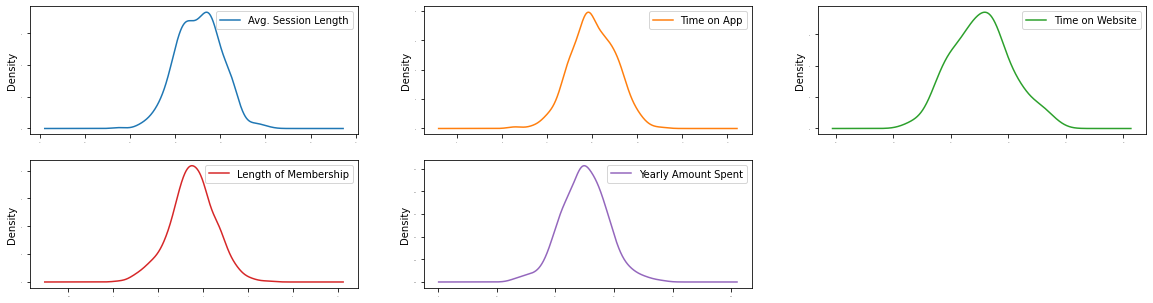

In [ ]:
# Выполним визуализацию данных с помощью графиков плотности
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True, fontsize=1, figsize=(20,8))
plt.show()

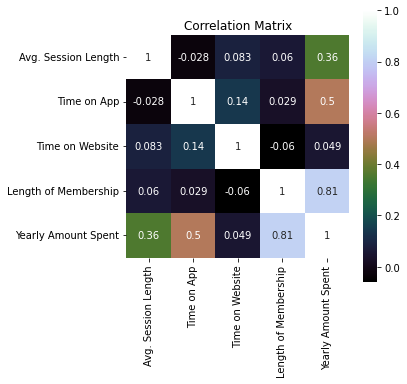

In [ ]:
# Построим корреляционную матицу
correlation = data.corr()
plt.figure(figsize=(5,5))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.show()

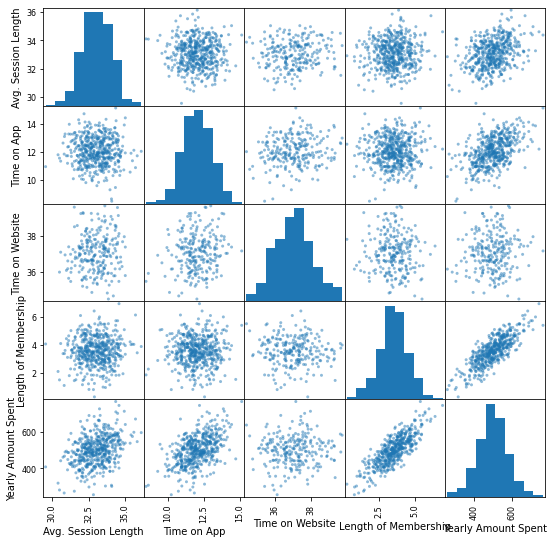

In [ ]:
# Построим матрицу диаграммы рассеивания (по диагонали гистограммы)
pd.plotting.scatter_matrix(data, figsize=(9,9))
plt.show()

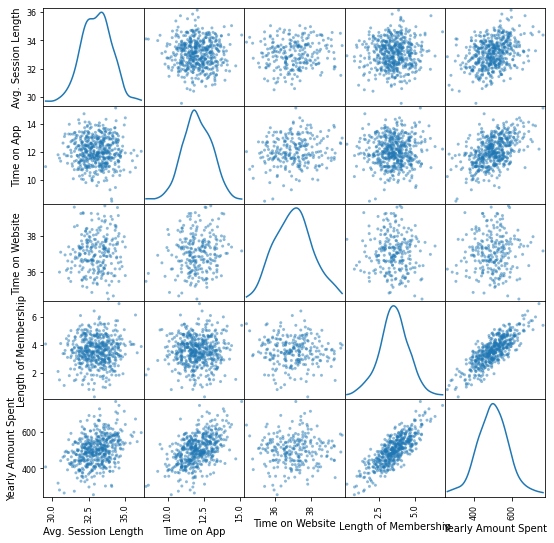

In [ ]:
# Построим матрицу диаграммы рассеивания (по диагонали плотности распределения)
pd.plotting.scatter_matrix(data, figsize=(9,9), diagonal='kde')
plt.show()

c. Проанализировать корреляционную зависимость между признаками;

In [ ]:
# Вычислим стандартный коэффициент корреляции между каждой парой атрибутов
corr_matrix = data.corr()
corr_matrix

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,0.082613,0.060247,0.355088
Time on App,-0.027826,1.000000,0.142974,0.029143,0.499328
Time on Website,0.082613,0.142974,1.000000,-0.059678,0.049472
Length of Membership,0.060247,0.029143,-0.059678,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,0.049472,0.809084,1.000000


In [ ]:
#Посмотрим, насколько каждый атрибут связан с потраченной за год суммой
corr_matrix["Yearly Amount Spent"].sort_values(ascending=False)

Yearly Amount Spent     1.000000
Length of Membership    0.809084
Time on App             0.499328
Avg. Session Length     0.355088
Time on Website         0.049472
Name: Yearly Amount Spent, dtype: float64

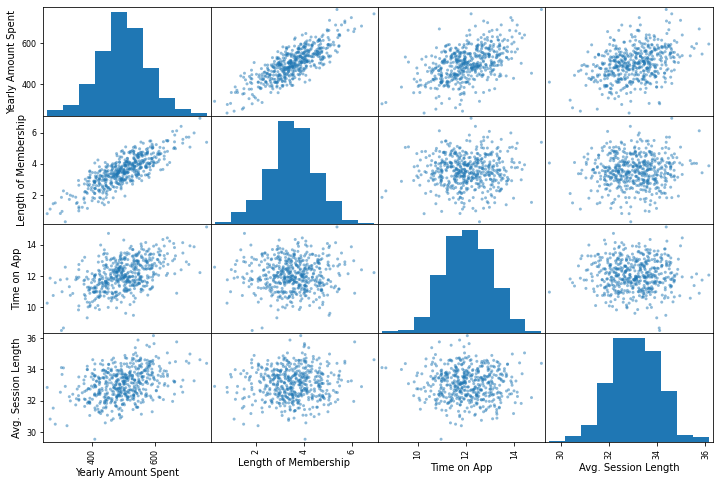

In [ ]:
# Построим матрицу диаграммы рассеивания (по диагонали гистограммы) для аттрибутов, которые представляются наиболее связанными с суммой, потраченной за год.
attributes = ["Yearly Amount Spent", "Length of Membership", "Time on App", "Avg. Session Length"]
pd.plotting.scatter_matrix(data[attributes], figsize=(12,8))
plt.show()

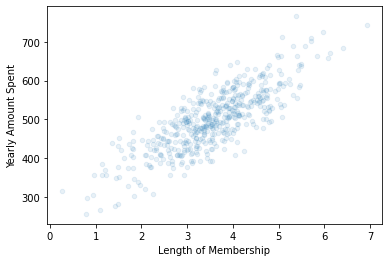

In [ ]:
# Многообещающим атрибутом для прогнозирования суммы потраченной за год является Срок членства. По графику видно, что корреляция очень сильная.
data.plot(kind="scatter", x="Length of Membership", y="Yearly Amount Spent", alpha=0.1)
plt.show()

d. Поэкспериментировать с комбинациями атрибутов. При необходимости добавить новые атрибуты в набор данных. Не нашел данные, которые можно сгруппировать :( e. При необходимости выполнить очистку данных одним из методов

In [ ]:
# Time on Website единственный из признаков, который имеет пустые значения. Он имеет самую маленькую корреляцию к сумме, потраченной за год (0.049472). Поэтому принято решение его удалить.
data_1 = data.drop('Time on Website', axis=1)
data_1

,Email,Address,Avatar,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,4.446308,599.406092
...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,2.336485,456.469510


f. Выполнить отбор существенных признаков. Сформировать набор данных из существенных признаков.

In [ ]:

# Выберем лучшие признаки с помощью SelectKBest
data_X = data_1.iloc[:,3:6]
data_Y = data_1["Yearly Amount Spent"]
"""
bestfeatures = SelectKBest(f_classif, k=2)
fit = bestfeatures.fit(data_X, data_Y)
"""
bestfeatures = SelectKBest(mutual_info_regression, k=3)
fit = bestfeatures.fit(data_X, data_Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data_X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores

,0,0
0,Avg. Session Length,0.091478
1,Time on App,0.183640
2,Length of Membership,0.562059


In [ ]:

# Признак Avg. Session Length имеет худшую оценку и является несущественным, принято решение его удалить, тем самым сформировав набор данных из существенных признаков
data_essential_features_not_cleaned = data_1.drop('Avg. Session Length', axis=1)
data_essential_features = data_essential_features_not_cleaned.iloc[:, 3:]
data_essential_features

,Time on App,Length of Membership,Yearly Amount Spent
0,12.655651,4.082621,587.951054
1,11.109461,2.664034,392.204933
2,11.330278,4.104543,487.547505
3,13.717514,3.120179,581.852344
4,12.795189,4.446308,599.406092
...,...,...,...
495,13.566160,3.746573,573.847438
496,11.695736,3.576526,529.049004
497,11.499409,4.958264,551.620145
498,12.391423,2.336485,456.469510


g. При необходимости преобразовать текстовые или категориальные признаки одним из методов

In [ ]:

# Выделим категории из адреса, выделять будем штат
data_address = [i.split()[-2] for i in data_1['Address']]

# Выделим категории из email, выделять будем домен
data_email = [i.split('@')[-1] for i in data_1['Email']]

# Заменим значения в наборе данных
data_2 = data_1.copy()
data_2['Address'] = data_address
data_2['Email'] = data_email

# Преобразуем текстовые признаки
ordinal_encoder = OrdinalEncoder()

avatar_encoded = ordinal_encoder.fit_transform(data_2['Avatar'].values.reshape(-1,1))
address_encoded = ordinal_encoder.fit_transform(data_2['Address'].values.reshape(-1,1))
email_encoded = ordinal_encoder.fit_transform(data_2['Email'].values.reshape(-1,1))

data_3 = data_2.copy()
data_3['Avatar'] = avatar_encoded
data_3['Address'] = address_encoded
data_3['Email'] = email_encoded
data_3

,Email,Address,Avatar,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,58.0,29.0,132.0,34.497268,12.655651,4.082621,587.951054
1,93.0,8.0,25.0,31.926272,11.109461,2.664034,392.204933
2,241.0,11.0,6.0,33.000915,11.330278,4.104543,487.547505
3,73.0,43.0,114.0,34.305557,13.717514,3.120179,581.852344
4,43.0,47.0,80.0,33.330673,12.795189,4.446308,599.406092
...,...,...,...,...,...,...,...
495,40.0,54.0,127.0,33.237660,13.566160,3.746573,573.847438
496,73.0,8.0,104.0,34.702529,11.695736,3.576526,529.049004
497,93.0,52.0,18.0,32.646777,11.499409,4.958264,551.620145
498,93.0,53.0,128.0,33.322501,12.391423,2.336485,456.469510


h. Выполнить преобразование данных для обоих наборов (исходного и сформированного) одним из методов по варианту. (Min-max масштабирование)

In [ ]:

# Преобразовываем исходный набор
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_data = pd.DataFrame(scaler.fit_transform(data_3))
rescaled_data

,0,1,2,3,4,5,6
0,0.238683,0.475410,0.963504,0.751425,0.626620,0.573101,0.651040
1,0.382716,0.131148,0.182482,0.362306,0.393016,0.359869,0.266355
2,0.991770,0.180328,0.043796,0.524953,0.426378,0.576396,0.453725
3,0.300412,0.704918,0.832117,0.722409,0.787050,0.428434,0.639055
4,0.176955,0.770492,0.583942,0.574861,0.647702,0.627768,0.673552
...,...,...,...,...,...,...,...
495,0.164609,0.885246,0.927007,0.560784,0.764183,0.522589,0.623324
496,0.300412,0.131148,0.759124,0.782491,0.481592,0.497028,0.535285
497,0.382716,0.852459,0.131387,0.471354,0.451931,0.704722,0.579642
498,0.382716,0.868852,0.934307,0.573625,0.586699,0.310634,0.392650


In [ ]:
# Преобразовываем набор данных из существенных признаков
rescaled_data_essential_features = pd.DataFrame(scaler.fit_transform(data_essential_features))
rescaled_data_essential_features

,0,1,2
0,0.626620,0.573101,0.651040
1,0.393016,0.359869,0.266355
2,0.426378,0.576396,0.453725
3,0.787050,0.428434,0.639055
4,0.647702,0.627768,0.673552
...,...,...,...
495,0.764183,0.522589,0.623324
496,0.481592,0.497028,0.535285
497,0.451931,0.704722,0.579642
498,0.586699,0.310634,0.392650


В имеющихся двух наборах данных (исходном и их существенных признаков) выделить обучающую и тестовую выборки данных.

In [ ]:
test_size = 0.2
seed = 7

rescaled_data_X = rescaled_data.iloc[:, :6]
rescaled_data_Y = rescaled_data[6]

rescaled_data_X_train, rescaled_data_X_test, rescaled_data_Y_train, rescaled_data_Y_test =\
train_test_split(rescaled_data_X, rescaled_data_Y, test_size=test_size, random_state=seed)

rescaled_data_essential_features_X = rescaled_data_essential_features.iloc[:, :2]
rescaled_data_essential_features_Y = rescaled_data_essential_features[2]

rescaled_data_essential_features_X_train, rescaled_data_essential_features_X_test, rescaled_data_essential_features_Y_train, rescaled_data_essential_features_Y_test =\
train_test_split(rescaled_data_essential_features_X, rescaled_data_essential_features_Y, test_size=test_size, random_state=seed)

Сравнить линейную (по варианту) и полиномиальную регрессионные модели на обучающих выборках для обоих наборов данных. Для оценки качества моделей использовать метрики: корень из среднеквадратичной ошибки, R^2 (По варианту линейная регрессия (нерегуляризованная линейная регрессия))

In [ ]:

# Проделаем все действия для исходных данных
model = LinearRegression()
model.fit(rescaled_data_X_train, rescaled_data_Y_train)
rescaled_data_Y_pred = model.predict(rescaled_data_X_train)
rmse_lin = np.sqrt(mean_squared_error(rescaled_data_Y_train, rescaled_data_Y_pred))
r2_lin = r2_score(rescaled_data_Y_train, rescaled_data_Y_pred)
print("RMSE for Linear Regression:", rmse_lin)
print("R2_score for Linear Regression", r2_lin)
polynomial_features = PolynomialFeatures(degree=2)
rescaled_data_X_poly = polynomial_features.fit_transform(rescaled_data_X_train)
model = LinearRegression()
model.fit(rescaled_data_X_poly, rescaled_data_Y_train)
rescaled_data_Y_poly_pred = model.predict(rescaled_data_X_poly)
rmse_poly = np.sqrt(mean_squared_error(rescaled_data_Y_train, rescaled_data_Y_poly_pred))
r2_poly = r2_score(rescaled_data_Y_train, rescaled_data_Y_poly_pred)
print("RMSE for Polynomial Regression:", rmse_poly)
print("R2_score for Linear Regression", r2_poly)

RMSE for Linear Regression: 0.01928945824225549
R2_score for Linear Regression 0.9847285482146783
RMSE for Polynomial Regression: 0.018584003644148257
R2_score for Linear Regression 0.9858251383569547


In [ ]:
# Проделаем все действия для набора данных из существенных признаков
model = LinearRegression()
model.fit(rescaled_data_essential_features_X_train, rescaled_data_essential_features_Y_train)
rescaled_data_essential_features_Y_pred = model.predict(rescaled_data_essential_features_X_train)
rmse_lin = np.sqrt(mean_squared_error(rescaled_data_essential_features_Y_train,
                                      rescaled_data_essential_features_Y_pred))
r2_lin = r2_score(rescaled_data_essential_features_Y_train, rescaled_data_essential_features_Y_pred)
print("RMSE for Linear Regression:", rmse_lin)
print("R2_score for Linear Regression", r2_lin)
polynomial_features = PolynomialFeatures(degree=2)
rescaled_data_essential_features_X_poly = polynomial_features.fit_transform(rescaled_data_essential_features_X_train)
model = LinearRegression()
model.fit(rescaled_data_essential_features_X_poly, rescaled_data_essential_features_Y_train)
rescaled_data_essential_features_Y_poly_pred = model.predict(rescaled_data_essential_features_X_poly)
rmse_poly = np.sqrt(mean_squared_error(rescaled_data_essential_features_Y_train, rescaled_data_essential_features_Y_poly_pred))
r2_poly = r2_score(rescaled_data_essential_features_Y_train, rescaled_data_essential_features_Y_poly_pred)
print("RMSE for Polynomial Regression:", rmse_poly)
print("R2_score for Linear Regression", r2_poly)

RMSE for Linear Regression: 0.05342743992415198
R2_score for Linear Regression 0.8828427972381115
RMSE for Polynomial Regression: 0.05334704673322014
R2_score for Linear Regression 0.8831951089037249


Для лучшей модели на лучшем наборе данных выполнить Grid поиск лучшего гиперпараметра регрессионной модели на обучающей выборке. Построить графики результатов поиска. Определить значение лучшего гиперпараметра.

Poly degree =  2
RMSE for Polynomial Regression:  0.018584003644148257
R2_score for Linear Regression:  0.9858251383569547
Poly degree =  3
RMSE for Polynomial Regression:  0.01726737501050813
R2_score for Linear Regression:  0.9877624943093
Poly degree =  4
RMSE for Polynomial Regression:  0.013323117348159554
R2_score for Linear Regression:  0.9927146239974258
Poly degree =  5
RMSE for Polynomial Regression:  7.219794776704585e-14
R2_score for Linear Regression:  1.0
Poly degree =  6
RMSE for Polynomial Regression:  3.015267270471982e-14
R2_score for Linear Regression:  1.0
Names:  [2, 3, 4, 5, 6]
RMSE:  [0.018584003644148257, 0.01726737501050813, 0.013323117348159554, 7.219794776704585e-14, 3.015267270471982e-14]
Names:  [2, 3, 4, 5, 6]
R2:  [0.9858251383569547, 0.9877624943093, 0.9927146239974258, 1.0, 1.0]


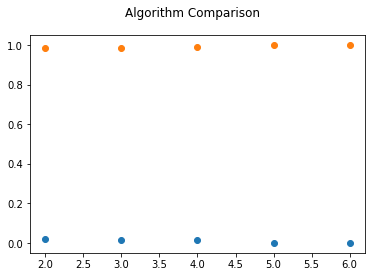

In [ ]:
# RMSE полиномиальной регрессии исходного набора данных показал лучший результат.
Deg = [2, 3, 4, 5, 6]
results_rmse = []
results_r2 = []
names = []
for deg in Deg:
    polynomial_features = PolynomialFeatures(degree=deg)
    rescaled_data_X_poly = polynomial_features.fit_transform(rescaled_data_X_train)
    model = LinearRegression()
    model.fit(rescaled_data_X_poly, rescaled_data_Y_train)
    rescaled_data_Y_poly_pred = model.predict(rescaled_data_X_poly)
    rmse = np.sqrt(mean_squared_error(rescaled_data_Y_train, rescaled_data_Y_poly_pred))
    r2 = r2_score(rescaled_data_Y_train, rescaled_data_Y_poly_pred)
    results_rmse.append(rmse)
    results_r2.append(r2)
    names.append(deg)
    print('Poly degree = ', deg)
    print('RMSE for Polynomial Regression: ', rmse)
    print('R2_score for Linear Regression: ', r2)
print('Names: ', names)
print("RMSE: ", results_rmse)
print('Names: ', names)
print('R2: ', results_r2)

plt.plot(names, results_rmse, 'o')
plt.plot(names, results_r2, 'o')
plt.suptitle('Algorithm Comparison')
plt.show()

Для лучшей модели на лучшем наборе данных выполнить Grid поиск лучшего гиперпараметра регрессионной модели на тестовом выборке. Построить графики результатов поиска. Скорректировать значение лучшего гиперпараметра модели.

Poly degree =  2
RMSE for Polynomial Regression:  0.020721264432667502
R2_score for Linear Regression:  0.981921257183405
Poly degree =  3
RMSE for Polynomial Regression:  0.024499333671538677
R2_score for Linear Regression:  0.9747277292286848
Poly degree =  4
RMSE for Polynomial Regression:  0.06173436047211702
R2_score for Linear Regression:  0.8395315610836641
Poly degree =  5
RMSE for Polynomial Regression:  0.6872392337439747
R2_score for Linear Regression:  -18.886191193206862
Poly degree =  6
RMSE for Polynomial Regression:  0.30657157454583234
R2_score for Linear Regression:  -2.957304687710478
Names:  [2, 3, 4, 5, 6]
RMSE:  [0.020721264432667502, 0.024499333671538677, 0.06173436047211702, 0.6872392337439747, 0.30657157454583234]
Names:  [2, 3, 4, 5, 6]
R2:  [0.981921257183405, 0.9747277292286848, 0.8395315610836641, -18.886191193206862, -2.957304687710478]


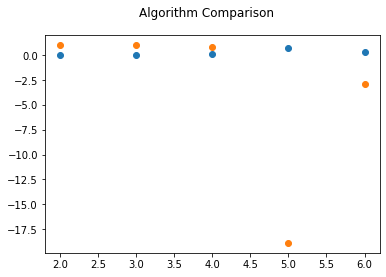

In [ ]:
# На предыдущем этапе лучшие из параметров дает полином со степенью 6
Deg = [2, 3, 4, 5, 6]
results_rmse = []
results_r2 = []
names = []
for deg in Deg:
    polynomial_features = PolynomialFeatures(degree=deg)
    rescaled_data_X_poly = polynomial_features.fit_transform(rescaled_data_X_train)
    model = LinearRegression()
    model.fit(rescaled_data_X_poly, rescaled_data_Y_train)
    rescaled_data_X_poly_test = polynomial_features.fit_transform(rescaled_data_X_test)
    rescaled_data_Y_poly_pred = model.predict(rescaled_data_X_poly_test)
    rmse = np.sqrt(mean_squared_error(rescaled_data_Y_test, rescaled_data_Y_poly_pred))
    r2 = r2_score(rescaled_data_Y_test, rescaled_data_Y_poly_pred)
    results_rmse.append(rmse)
    results_r2.append(r2)
    names.append(deg)
    print('Poly degree = ', deg)
    print('RMSE for Polynomial Regression: ', rmse)
    print('R2_score for Linear Regression: ', r2)
print('Names: ', names)
print("RMSE: ", results_rmse)
print('Names: ', names)
print('R2: ', results_r2)

plt.plot(names, results_rmse, 'o')
plt.plot(names, results_r2, 'o')
plt.suptitle('Algorithm Comparison')
plt.show()

"""
В лабораторной работе был выполнен разведочный анализ данных, выделен набор существенных признаков из данных (туда попали атрибуты Time on App, Length of Membership
и Yearly Amount Spent), из наборов данных были получены тестовые и обучающие выборки (в соотношении 4 к 1), были созданы модели для исходного набора данных и набора
существенных признаков из данных, основанные на линейной регрессии и полиномиальной регрессии. Была выделена лучшая модель на лучшем наборе данных (полиномиальная
регрессия на исходном наборе данных). Для лучшей модели на лучшей модели данных был выполнен Grid поиск лучшего гиперпараметра на обучающей выборке (6) и
скорректирован на тестовой выборке (2).
"""

"""
В лабораторной работе мы сформировываем набор существенных признаков до того, как приводим категориальные и текстовые атрибуты
к числовым значениям. У меня возник вопрос, почему так? И я провел эксперимент:
1. Сначала привел object атрибуты к числовым
2. Посмотрел, насколько каждый атрибут связан с потраченной за год суммой

Вывод: object атрибуты после привода их к числовым имеют низкую корреляцию к потраченной за год суммой, поэтому эти данные все равно бы не попали в набор существенных признаков и то, что мы делаем в лабораторной работе справедливо
"""

In [ ]:
data_experiment = data.copy()

# Выделим категории из адреса, выделять будем штат
data_address = [i.split()[-2] for i in data_experiment['Address']]

# Выделим категории из email, выделять будем домен
data_email = [i.split('@')[-1] for i in data_experiment['Email']]

# Заменим значения в наборе данных
data_experiment_1 = data_experiment.copy()
data_experiment_1['Address'] = data_address
data_experiment_1['Email'] = data_email

# Преобразуем текстовые признаки
ordinal_encoder = OrdinalEncoder()

avatar_encoded = ordinal_encoder.fit_transform(data_experiment_1['Avatar'].values.reshape(-1,1))
address_encoded = ordinal_encoder.fit_transform(data_experiment_1['Address'].values.reshape(-1,1))
email_encoded = ordinal_encoder.fit_transform(data_experiment_1['Email'].values.reshape(-1,1))

data_experiment_2 = data_experiment_1.copy()
data_experiment_2['Avatar'] = avatar_encoded
data_experiment_2['Address'] = address_encoded
data_experiment_2['Email'] = email_encoded

#Посмотрим, насколько каждый атрибут связан с потраченной за год суммой
corr_matrix_experiment = data_experiment_2.corr()
corr_matrix_experiment["Yearly Amount Spent"].sort_values(ascending=False)

Yearly Amount Spent     1.000000
Length of Membership    0.809084
Time on App             0.499328
Avg. Session Length     0.355088
Time on Website         0.049472
Address                 0.037269
Email                   0.016101
Avatar                  0.015608
Name: Yearly Amount Spent, dtype: float64